In [2]:
#importing modules
import pandas  #reading dataset
import numpy as np #operating the data
import matplotlib.pyplot as plt #visualition
import seaborn as sns  #visualition

In [3]:
#Reading Dataset
heart_data=pandas.read_csv('heart.csv')
print(heart_data)
print(type(heart_data))  #dataframe

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [17]:
print(heart_data.describe(include='all'))
#gives necessary info about data
#this funciton was giving a lot of NaN values before pre-processing because of string values such as Sex, ChestPainType vs.

              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.210240       1.452070  132.396514   198.799564   
std      9.432617    0.407701       0.851832   18.514154   109.384145   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    0.000000       1.000000  120.000000   173.250000   
50%     54.000000    0.000000       2.000000  130.000000   223.000000   
75%     60.000000    0.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.603486  136.809368        0.404139    0.887364   
std      0.423046    0.805968   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0

<AxesSubplot:xlabel='Age', ylabel='HeartDisease'>

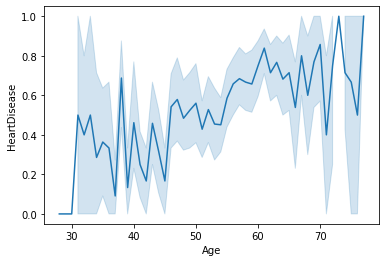

In [5]:
#Visualize 
sex_col=heart_data['Sex']
#print(heart_data[sex_col==0])
sns.lineplot(x='Age',y='HeartDisease', data=heart_data)
#this plot gives info according to age and heart diasease.As we can observe the possibility of people having heart disease increases by age.


<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

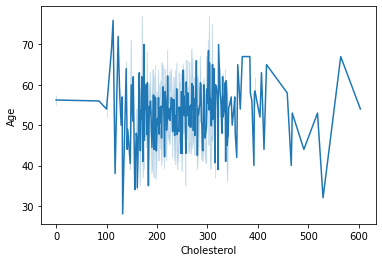

In [6]:
sns.lineplot(x='Cholesterol',y='Age', data=heart_data)
#In cholesterol-age plot we can observe most  of the cholesterol values is between 100 and 400 and also cholesterol values starting to come after 
#nearly 30 years

<BarContainer object of 918 artists>

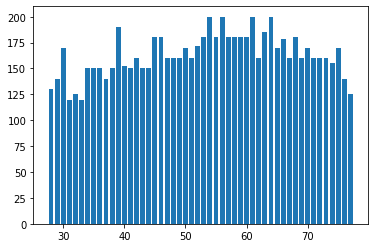

In [7]:
plt.bar(heart_data['Age'],heart_data['RestingBP'])
#Age-restingBP plot gives info in bar plot type.We can observe there is no restingBP value under 100 in nearly 30 years and nearly under 80.

<AxesSubplot:>

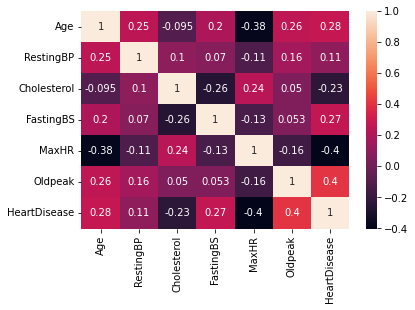

In [8]:
sns.heatmap(heart_data.corr(), annot=True) #coralation map=quatity of similarity
#Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships
#strong correlation(>0.50)

<AxesSubplot:xlabel='ST_Slope', ylabel='Age'>

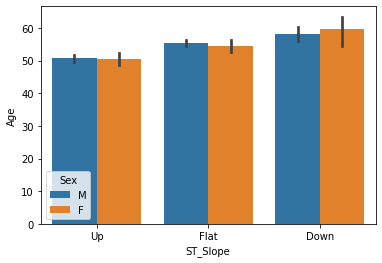

In [9]:
sns.barplot(x='ST_Slope',y='Age',hue='Sex',data=heart_data)
#Sex 0 means male and 1 means female.
#ST_Slope 0 means up,1 means down and 2 means flat.
#We can observe ST_Slope by age and sex. 



In [10]:
#Pre-processing
# we are prepare data for further analysis.I eliminated string values by assigning them integers.
St_slope_col=heart_data['ST_Slope']
print(set(St_slope_col))
#assigning integer to strings
encoding_map={'ST_Slope':
              {'Up':0,
               'Down':1,
               'Flat':2},
              'ExerciseAngina':
              {'N':0,
               'Y':1
                   },
              'RestingECG':
              {'Normal':0,
               'ST':1,
               'LVH':2
                   },
              'ChestPainType':
              {'ATA':0,
               'NAP':1,
               'ASY':2,
               'TA':3
                   },
              'Sex':
              {'M':0,
              'F':1
                   }}
heart_data.replace(encoding_map, inplace=True)
print(heart_data)


{'Up', 'Down', 'Flat'}
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  

In [11]:
#feature selection  -> same representation 
#feature extraction  -> different representation
#aim is reducing the input variable to your model by using only relevant data and getting rid of noise in data.
features=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG',
          'MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease'] #data loading
         
label='Sex'

x=heart_data[features]
y=heart_data[label]

In [12]:
#manually selecting
#feature extraction
from sklearn.feature_selection import SelectKBest #SelectKBest method selects the features according to the k highest score
from sklearn.feature_selection import chi2, f_classif
feature_selection=SelectKBest(f_classif, k=10) #k means how many feature you wanna choose
#feature_selection.fit(x,y)
feature_selection.fit_transform(x,y)


/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


array([[40. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  1. , ...,  1. ,  2. ,  1. ],
       [37. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  2. , ...,  1.2,  2. ,  1. ],
       [57. ,  1. ,  0. , ...,  0. ,  2. ,  1. ],
       [38. ,  0. ,  1. , ...,  0. ,  0. ,  0. ]])

<AxesSubplot:>

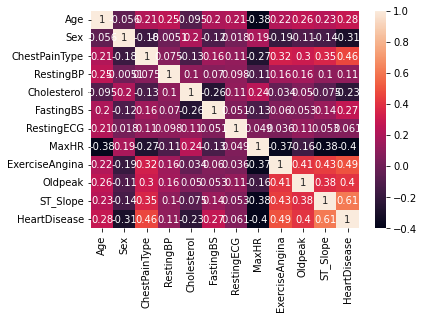

In [13]:
sns.heatmap(heart_data.corr(), annot=True) #k=10
##If correlation is strong(>0.50), it is getting more difficult to change one variable without changing another.In here, Heartdisease and ST_Slope has strong correlation which
#means the ST_Slope values tend to increase as the Heartdisease values increase.

In [14]:
print(f"old shape:{x.shape}")
print()
transformedX=feature_selection.transform(x); #transorm reduces values according to k 
print(f"new shape:{transformedX.shape}")
#according to k value transformes the data set with k values.

old shape:(918, 12)

new shape:(918, 10)


In [15]:
x[:5] #show features of heart_data


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,2,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,2,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [16]:
transformedX[:5] #show the info from transformed data

array([[ 40. ,   0. ,   0. , 289. ,   0. , 172. ,   0. ,   0. ,   0. ,
          0. ],
       [ 49. ,   1. ,   1. , 180. ,   0. , 156. ,   0. ,   1. ,   2. ,
          1. ],
       [ 37. ,   0. ,   0. , 283. ,   0. ,  98. ,   0. ,   0. ,   0. ,
          0. ],
       [ 48. ,   1. ,   2. , 214. ,   0. , 108. ,   1. ,   1.5,   2. ,
          1. ],
       [ 54. ,   0. ,   1. , 195. ,   0. , 122. ,   0. ,   0. ,   0. ,
          0. ]])